In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize_scalar

import matplotlib as mpl
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

np.random.seed(1000)

## Data & settings: model shift

In [3]:
def get_isotropic_data(n, p, beta, sigma):
    X = np.random.randn(n, p)
    Y = X @ beta + sigma * np.random.randn(n, 1)
    return X, Y

## Estimates

In [4]:
def get_HPS_estimator(X1, Y1, X2, Y2):
    K = np.linalg.inv(X1.T @ X1 + X2.T @ X2)
    return K @ (X1.T @ Y1 + X2.T @ Y2)

def excess_risk_isotropic_cov(beta_hat, beta):
    return np.linalg.norm(beta_hat - beta) ** 2

def get_mse(X, Y, beta):
    err = (X @ beta - Y)**2
    return np.mean(err)

def get_bias_plus_variance(X1, X2, n1, n2, p, sigma, d):
    K = np.linalg.inv(X1.T @ X1 + X2.T @ X2)
    variance = sigma**2 * np.trace(K)
    
    bias = (2.0 * d**2 / p) * (np.linalg.norm(K @ X1.T @ X1, 'fro') **2)
    return variance + bias

def get_ols_variance(X, sigma):
    return sigma**2 * np.trace( np.linalg.inv(X.T @ X) )

def theoretical_estimate(n1, n2, p, sigma, d):
    variance = p * sigma**2 / (n1 + n2 - p)
    bias = 2* d**2 * (n1**2 * (n1 + n2 - p) + p * n1 * n2) / ((n1 + n2)**2 * (n1 + n2 - p))
    return variance + bias

def get_results(n1_list, n2, p, sigma, d):
    emp_list = []
    ols_list = []
    thy_list = []
    
    for n1 in n1_list:
        X1 = np.random.randn(n1, p)
        X2 = np.random.randn(n2, p)
        
        bias_var = get_bias_plus_variance(X1, X2, n1, n2, p, sigma, d)
        estimate = theoretical_estimate(float(n1), float(n2), float(p), sigma, d)
        emp_list.append(bias_var)

#        ols_list.append(sigma**2 * p / (n2 - p))
        ols_list.append(sigma**2 * np.trace( np.linalg.inv(X2.T @ X2) ))
        
        thy_list.append(estimate)
    
    return emp_list, ols_list, thy_list

## Figure 3a: when d is small, transfer is always positive

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


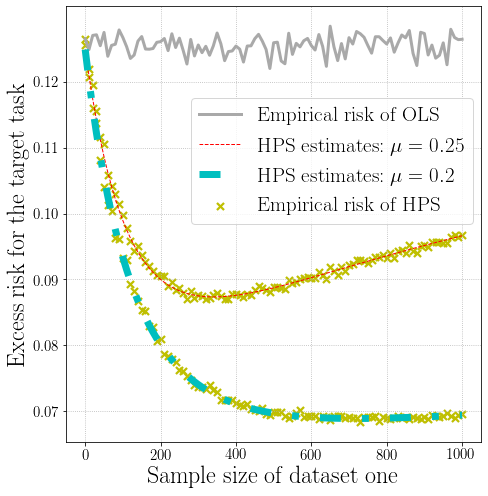

In [30]:
n2 = 300
p = 100
sigma = 0.5
n1_list = [10 * i for i in range(0, 101)]


plt.figure(figsize=(7,7))



d = 0.25
emp_list_2, ols_list, thy_list_2 = get_results(n1_list, n2, p, sigma, d)

plt.plot(n1_list, ols_list, c='darkgrey', lw=3, label=r'$\mathrm{Empirical~risk~of~OLS}$')


plt.scatter(n1_list, emp_list_2, marker='x', c='y',  s=50, lw=2.2, label=r'$\mathrm{Empirical~risk~of~HPS}$')
plt.plot(n1_list, thy_list_2, c='r', lw=1, ls='dashed', label=r'$\mathrm{HPS~estimates}$' + r'$:\mu = \mathrm{'+str(d)+'}$')

d = 0.2
emp_list_1, ols_list, thy_list_1 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_1, marker='x', c='y',  s=50, lw=2.2)
plt.plot(n1_list, thy_list_1, c='c', lw=7, ls=(0, (3, 3, 1, 3)), label=r'$\mathrm{HPS~estimates}$' + r'$:\mu = \mathrm{'+str(d)+'}$')


plt.xlabel(r'$\mathrm{Sample~size~of~dataset~one}$', fontsize=24)
plt.ylabel(r'$\mathrm{Excess~risk~for~the~target~task}$', fontsize=24)
#axes = plt.gca()
#axes.set_xlim([1.0, 20.0])

plt.xticks(fontsize=15)
plt.yticks(np.arange(0.07, 0.13, 0.01), fontsize=15)
#plt.xlim([500, 4000])
#plt.ylim([0.01, 2])

plt.grid(ls = ':', lw=0.8)
plt.legend(fontsize=21, loc = (0.3, 0.5))
plt.tight_layout()
plt.savefig('model_shift_positive.eps')

## Figure 3b: when d is in the intermediate range, transfer goes down and up

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


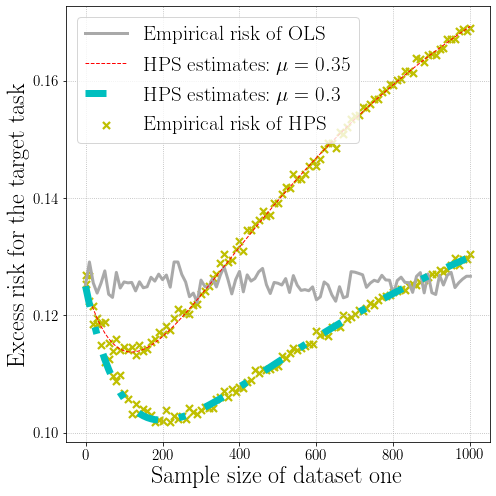

In [31]:
n2 = 300
p = 100
sigma = 0.5
n1_list = [10 * i for i in range(0, 101)]


plt.figure(figsize=(7,7))


d = 0.35
emp_list_4, ols_list, thy_list_4 = get_results(n1_list, n2, p, sigma, d)
plt.plot(n1_list, ols_list, c='darkgrey', lw=3, label=r'$\mathrm{Empirical~risk~of~OLS}$')

plt.scatter(n1_list, emp_list_4, marker='x', c='y',  s=50, lw=2.2, label=r'$\mathrm{Empirical~risk~of~HPS}$')
plt.plot(n1_list, thy_list_4, c='r', lw=1, ls='dashed', label=r'$\mathrm{HPS~estimates}$' + r'$:\mu = \mathrm{'+str(d)+'}$')

d = 0.3
emp_list_3, ols_list, thy_list_3 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_3, marker='x', c='y',  s=50, lw=2.2)
plt.plot(n1_list, thy_list_3, c='c', lw=7, ls=(0, (3, 3, 1, 3)), label=r'$\mathrm{HPS~estimates}$' + r'$:\mu = \mathrm{'+str(d)+'}$')


plt.xlabel(r'$\mathrm{Sample~size~of~dataset~one}$', fontsize=24)
plt.ylabel(r'$\mathrm{Excess~risk~for~the~target~task}$', fontsize=24)
#axes = plt.gca()
#axes.set_xlim([1.0, 20.0])

plt.yticks(np.arange(0.1, 0.18, 0.02), fontsize=15)
plt.xticks(fontsize=15)
#plt.xlim([500, 4000])
#plt.ylim([0.01, 2])

plt.grid(ls = ':', lw=0.8)
plt.legend(fontsize=21)#,loc=3)
plt.tight_layout()
plt.savefig('model_shift_transition.eps')

## Fig 3c: when d is large, transfer is always negative

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


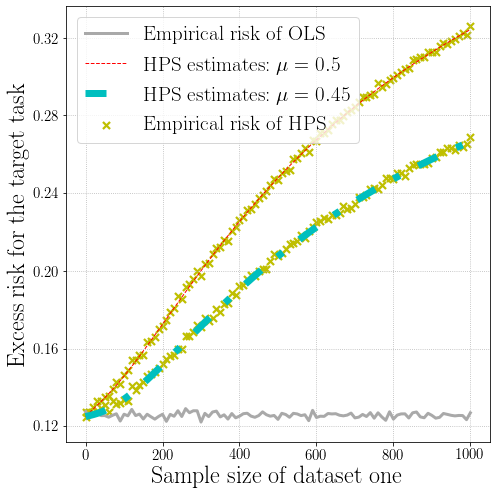

In [32]:
n2 = 300
p = 100
sigma = 0.5
n1_list = [10 * i for i in range(0, 101)]


plt.figure(figsize=(7,7))


d = 0.5
emp_list_4, ols_list, thy_list_4 = get_results(n1_list, n2, p, sigma, d)
plt.plot(n1_list, ols_list, c='darkgrey', lw=3, label=r'$\mathrm{Empirical~risk~of~OLS}$')

plt.scatter(n1_list, emp_list_4, marker='x', c='y',  s=50, lw=2.2, label=r'$\mathrm{Empirical~risk~of~HPS}$')
plt.plot(n1_list, thy_list_4, c='r', lw=1, ls='dashed', label=r'$\mathrm{HPS~estimates}$' + r'$:\mu = \mathrm{'+str(d)+'}$')

d = 0.45
emp_list_3, ols_list, thy_list_3 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_3, marker='x', c='y',  s=50, lw=2.2)
plt.plot(n1_list, thy_list_3, c='c', lw=7, ls=(0, (3, 3, 1, 3)), label=r'$\mathrm{HPS~estimates}$' + r'$:\mu = \mathrm{'+str(d)+'}$')


plt.xlabel(r'$\mathrm{Sample~size~of~dataset~one}$', fontsize=24)
plt.ylabel(r'$\mathrm{Excess~risk~for~the~target~task}$', fontsize=24)
#axes = plt.gca()
#axes.set_xlim([1.0, 20.0])

plt.yticks(np.arange(0.12, 0.36, 0.04), fontsize=15)
plt.xticks(fontsize=15)
#plt.xlim([500, 4000])
#plt.ylim([0.01, 2])

plt.grid(ls = ':', lw=0.8)
plt.legend(fontsize=21)#,loc=3)
plt.tight_layout()
plt.savefig('model_shift_negative.eps')

## Fig 1: motivating example

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


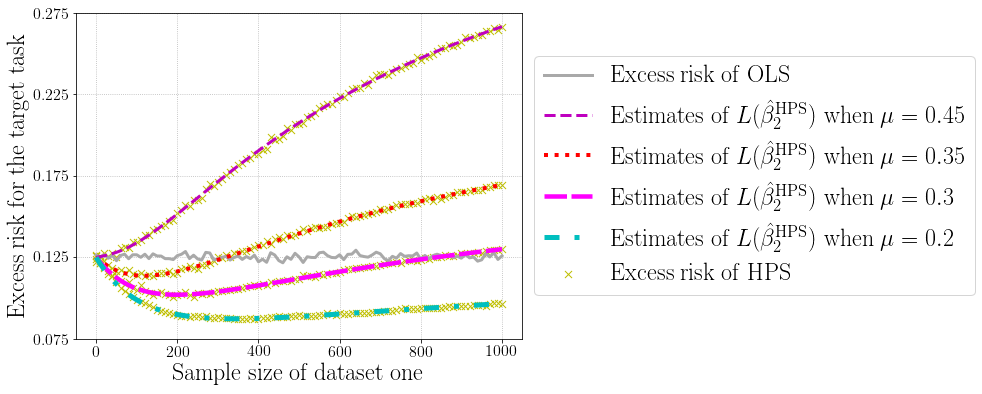

In [8]:
import matplotlib as mpl
from matplotlib import rc

#mpl.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)
#rc('legend', fontsize=12)
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

n2 = 300
p = 100
sigma = 0.5
n1_list = [10 * i for i in range(0, 101)]

plt.figure(figsize=(8,6))


d = 0.45
emp_list_5, ols_list, thy_list_5 = get_results(n1_list, n2, p, sigma, d)
#ols_list = [sigma**2 * np.trace() for n1 ]
#plt.scatter(n1_list, ols_list, marker='x', c='m',  s=50, lw=1, label=r'Excess risk of OLS')
plt.plot(n1_list, ols_list,  c='darkgrey', lw=3, label=r'$\mathrm{Excess~risk~of~OLS}$')

plt.scatter(n1_list, emp_list_5, marker='x', c='y',  s=50, lw=1, label=r'$\mathrm{Excess~risk~of~HPS}$')
plt.plot(n1_list, thy_list_5, c='m', lw=3, ls='dashed', label=r'$\mathrm{Estimates~of}~L(\hat{\beta}_2^{\mathrm{HPS}})~\mathrm{when}~\mu=0.45$')

d = 0.35
emp_list_6, ols_list, thy_list_6 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_6, marker='x', c='y',  s=50, lw=1)
plt.plot(n1_list, thy_list_6, c='r', lw=4, ls='dotted', label=r'$\mathrm{Estimates~of}~L(\hat{\beta}_2^{\mathrm{HPS}})~\mathrm{when}~\mu=0.35$')

d = 0.3
emp_list_8, ols_list, thy_list_8 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_8, marker='x', c='y',  s=50, lw=1)
plt.plot(n1_list, thy_list_8, c='magenta', lw=4.5, ls=(0, (5, 1)), label=r'$\mathrm{Estimates~of}~L(\hat{\beta}_2^{\mathrm{HPS}})~\mathrm{when}~\mu=0.3$')

d = 0.25
emp_list_7, ols_list, thy_list_7 = get_results(n1_list, n2, p, sigma, d)
plt.scatter(n1_list, emp_list_7, marker='x', c='y',  s=50, lw=1.0)
plt.plot(n1_list, thy_list_7, c='c', lw=5, ls=(0, (3, 3, 1, 3)), label=r'$\mathrm{Estimates~of}~L(\hat{\beta}_2^{\mathrm{HPS}})~\mathrm{when}~\mu=0.2$')



plt.xlabel(r'$\mathrm{Sample~size~of~dataset~one}$', fontsize=24)
plt.ylabel('$\mathrm{Excess~risk~for~the~target~task}$', fontsize=24)
#axes = plt.gca()
#axes.set_xlim([1.0, 20.0])

plt.yticks(np.arange(0.075, 0.285, 0.05), fontsize=16)
plt.xticks(fontsize=16)
#plt.xlim([500, 4000])
plt.ylim([0.075, 0.275])

plt.grid(ls = ':', lw=0.8)
lgd = plt.legend(fontsize=24, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.tight_layout()
plt.savefig('motivation.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')